In [204]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from nltk import pos_tag
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
import sys
import re
import os
import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en

import spacy

import sys
%matplotlib inline 
nltk.download('tagsets')
nltk.download('wordnet')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Custom Function

In [205]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [206]:
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def betterPOS(message):
    pos = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(message)]
    return pos

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def spacyPOS(message):
    doc = nlp(message)
    result = []
    for token in doc:
        result.append((token.lemma_, token.pos_))
    return result

In [207]:
df = pd.read_csv(r"D:\Programs\Jupyter Notebooks\ThesisScripts-master\Annotations\terror0\terror0_0\terror0_0.csv") #CHANGE VALUE PER FILE
df.head()

,Unnamed: 0,message,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,0,first,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Hi Brian,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Hello,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Hi,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
df['message'] = df['message'].astype(str)
#df['POS'] = df['message'].str.split().map(pos_tag)
df['cleaned_message'] = df['message'].map(expand_contractions)
#df['lemmatized'] = df['cleaned_message'].map(betterPOS)
#df['lemmatized'] = df['lemmatized'].astype(str)
#df['POS'] = df['lemmatized'].str.split().map(pos_tag)
df['POS'] = df['cleaned_message'].map(spacyPOS)
df.head(10)

,Unnamed: 0,message,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic,cleaned_message,POS
0,0,first,NaN,NaN,NaN,NaN,NaN,NaN,first,"[(first, ADV)]"
1,1,Hi Brian,NaN,NaN,NaN,NaN,NaN,NaN,Hi Brian,"[(hi, INTJ), (Brian, PROPN)]"
2,2,Hello,NaN,NaN,NaN,NaN,NaN,NaN,Hello,"[(hello, INTJ)]"
3,3,Hi,NaN,NaN,NaN,NaN,NaN,NaN,Hi,"[(hi, INTJ)]"
4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,2,"[(2, NUM)]"
5,5,hi,NaN,NaN,NaN,NaN,NaN,NaN,hi,"[(hi, INTJ)]"
6,6,Gday,NaN,NaN,NaN,NaN,NaN,NaN,Gday,"[(gday, NOUN)]"
7,7,Lest go1,NaN,NaN,NaN,NaN,NaN,NaN,Lest go1,"[(lest, ADP), (go1, NOUN)]"
8,8,hey dad,NaN,NaN,NaN,NaN,NaN,NaN,hey dad,"[(hey, INTJ), (dad, NOUN)]"
9,9,Ollo,NaN,NaN,NaN,NaN,NaN,NaN,Ollo,"[(ollo, NOUN)]"


In [209]:
df['tagCounts'] = df['POS'].map(count_tags)
df.head(10)

,Unnamed: 0,message,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic,cleaned_message,POS,tagCounts
0,0,first,NaN,NaN,NaN,NaN,NaN,NaN,first,"[(first, ADV)]",{'ADV': 1}
1,1,Hi Brian,NaN,NaN,NaN,NaN,NaN,NaN,Hi Brian,"[(hi, INTJ), (Brian, PROPN)]","{'INTJ': 1, 'PROPN': 1}"
2,2,Hello,NaN,NaN,NaN,NaN,NaN,NaN,Hello,"[(hello, INTJ)]",{'INTJ': 1}
3,3,Hi,NaN,NaN,NaN,NaN,NaN,NaN,Hi,"[(hi, INTJ)]",{'INTJ': 1}
4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,2,"[(2, NUM)]",{'NUM': 1}
5,5,hi,NaN,NaN,NaN,NaN,NaN,NaN,hi,"[(hi, INTJ)]",{'INTJ': 1}
6,6,Gday,NaN,NaN,NaN,NaN,NaN,NaN,Gday,"[(gday, NOUN)]",{'NOUN': 1}
7,7,Lest go1,NaN,NaN,NaN,NaN,NaN,NaN,Lest go1,"[(lest, ADP), (go1, NOUN)]","{'ADP': 1, 'NOUN': 1}"
8,8,hey dad,NaN,NaN,NaN,NaN,NaN,NaN,hey dad,"[(hey, INTJ), (dad, NOUN)]","{'INTJ': 1, 'NOUN': 1}"
9,9,Ollo,NaN,NaN,NaN,NaN,NaN,NaN,Ollo,"[(ollo, NOUN)]",{'NOUN': 1}


##### DH POS Tag Count

In [210]:
dh = df.loc[df['Direct Harassment'] == 1.0]
dh.head()

,Unnamed: 0,message,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic,cleaned_message,POS,tagCounts
78,78,Lightning no one cares,1.0,NaN,NaN,NaN,NaN,NaN,Lightning no one cares,"[(lightning, NOUN), (no, DET), (one, NOUN), (c...","{'NOUN': 2, 'DET': 1, 'VERB': 1}"
287,287,stupid,1.0,NaN,NaN,NaN,NaN,NaN,stupid,"[(stupid, ADJ)]",{'ADJ': 1}
311,311,ugly,1.0,NaN,NaN,NaN,NaN,NaN,ugly,"[(ugly, ADJ)]",{'ADJ': 1}
675,675,this dosent seem video worthy,1.0,NaN,NaN,NaN,NaN,NaN,this dosent seem video worthy,"[(this, DET), (dosent, NOUN), (seem, VERB), (v...","{'DET': 1, 'NOUN': 2, 'VERB': 1, 'ADJ': 1}"
704,704,SOOO DIRTY!!!,1.0,NaN,NaN,NaN,NaN,NaN,SOOO DIRTY!!!,"[(sooo, ADJ), (dirty, ADJ), (!, PUNCT), (!, PU...","{'ADJ': 2, 'PUNCT': 3}"


<ipython-input-211-dc25a0686c57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh[tag] = dh['tagCounts'].map(lambda x: x.get(tag, 0))


<AxesSubplot:title={'center':'Frequency of POS Tags in Direct Harassment'}>

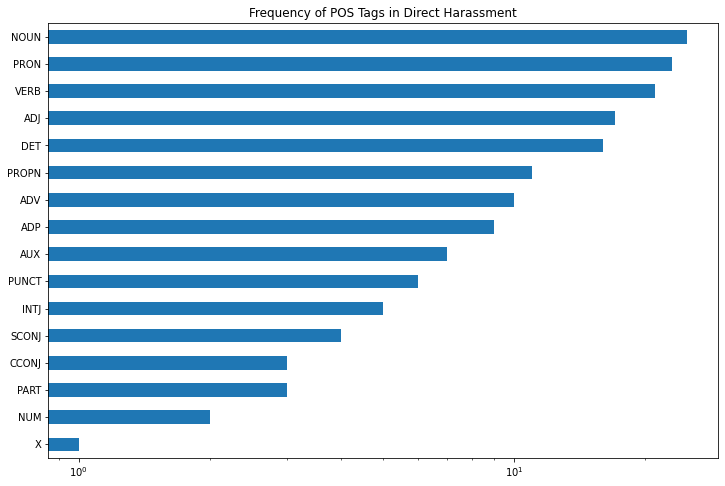

In [211]:
tag_set = list(set([tag for tags in dh['tagCounts'] for tag in tags]))
for tag in tag_set:
    dh[tag] = dh['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Direct Harassment'    
dh[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

##### HS POS Tag Count

In [212]:
hs = df.loc[df['Hate Speech'] == 1.0]
hs.head()

,Unnamed: 0,message,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic,cleaned_message,POS,tagCounts
648,648,he's an aussie. they have weird names.,NaN,1.0,NaN,NaN,NaN,NaN,he is an aussie. they have weird names.,"[(he, PRON), (be, AUX), (an, DET), (aussie, NO...","{'PRON': 2, 'AUX': 1, 'DET': 1, 'NOUN': 2, 'PU..."
877,877,ITS THE BLACK GUY!!,NaN,1.0,NaN,NaN,NaN,NaN,ITS THE BLACK GUY!!,"[(its, PRON), (the, DET), (BLACK, PROPN), (GUY...","{'PRON': 1, 'DET': 1, 'PROPN': 2, 'PUNCT': 2}"
895,895,it was one of the black guys,NaN,1.0,NaN,NaN,NaN,NaN,it was one of the black guys,"[(it, PRON), (be, AUX), (one, NUM), (of, ADP),...","{'PRON': 1, 'AUX': 1, 'NUM': 1, 'ADP': 1, 'DET..."
908,908,ITS THE BLACK GUY - Nogla 2020,NaN,1.0,NaN,NaN,NaN,NaN,ITS THE BLACK GUY - Nogla 2020,"[(its, PRON), (the, DET), (BLACK, PROPN), (GUY...","{'PRON': 1, 'DET': 1, 'PROPN': 3, 'PUNCT': 1, ..."
917,917,ITS THE WHITE GUY - Nogla 2020,NaN,1.0,NaN,NaN,NaN,NaN,ITS THE WHITE GUY - Nogla 2020,"[(its, PRON), (the, DET), (WHITE, PROPN), (GUY...","{'PRON': 1, 'DET': 1, 'PROPN': 3, 'PUNCT': 1, ..."


<ipython-input-213-49da2deb3432>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs[tag] = hs['tagCounts'].map(lambda x: x.get(tag, 0))


<AxesSubplot:title={'center':'Frequency of POS Tags in Hate Speech'}>

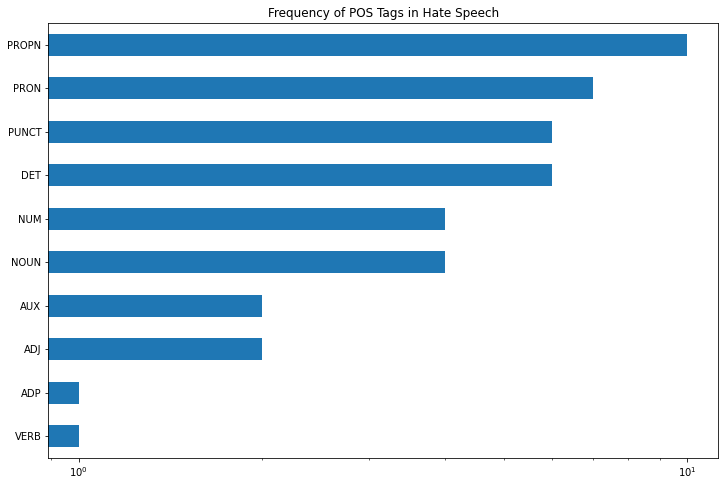

In [213]:
tag_set = list(set([tag for tags in hs['tagCounts'] for tag in tags]))
for tag in tag_set:
    hs[tag] = hs['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Hate Speech'    
hs[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

##### SH POS Tag Count

In [214]:
sh = df.loc[df['Sexual Harassment'] == 1.0]
sh.head()

,Unnamed: 0,message,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic,cleaned_message,POS,tagCounts


IndexError: index 0 is out of bounds for axis 0 with size 0

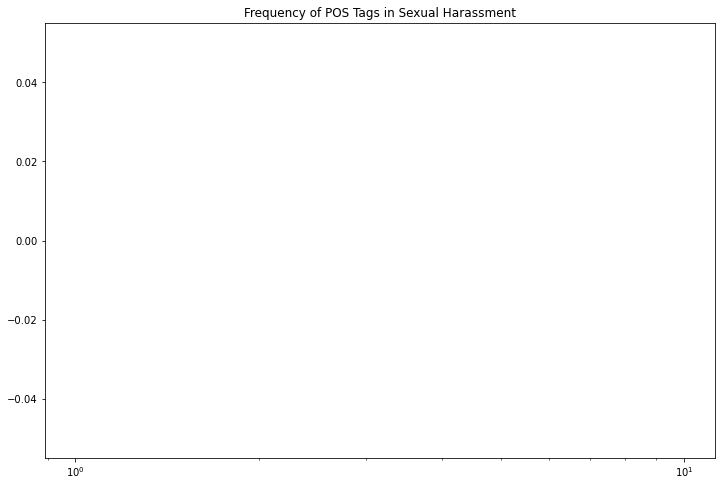

In [215]:
tag_set = list(set([tag for tags in sh['tagCounts'] for tag in tags]))
for tag in tag_set:
    sh[tag] = sh['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Sexual Harassment'    
sh[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

##### Trolling POS Tag Count

In [ ]:
t = df.loc[df['Trolling'] == 1.0]
t.head()

In [ ]:
tag_set = list(set([tag for tags in t['tagCounts'] for tag in tags]))
for tag in tag_set:
    t[tag] = t['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Trolling'    
t[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

##### Others POS Tag Count

In [ ]:
o = df.loc[df['Others'] == 1.0]
o.head()

In [ ]:
tag_set = list(set([tag for tags in o['tagCounts'] for tag in tags]))
for tag in tag_set:
    o[tag] = o['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Others'    
o[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

##### Toxic POS Tag Counts

In [ ]:
tox = df.loc[df['Toxic'] == 1.0]
tox.head()

In [ ]:
tag_set = list(set([tag for tags in tox['tagCounts'] for tag in tags]))
for tag in tag_set:
    tox[tag] = tox['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Toxic'    
tox[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

In [ ]:
os.chdir("D:\Programs\Jupyter Notebooks\ThesisScripts-master\Annotations\CSVs")
df.to_csv('terror0_0.csv')